# **Project Description-**
 **Data Context** -
>Airbnb has revolutionized travel by enabling people to explore destinations in a more personalized and intimate way. Since its inception in 2008, it has grown to become an essential platform for hosts to offer a variety of accommodations and for guests to experience cities uniquely. 

>This dataset describes the listing activity and metrics in NYC, NY for 2019 which can be used to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Objective-**
>This project aims to conduct an in-depth analysis of the 2019 Airbnb NYC dataset to understand the dynamics of guest-host interactions and the distribution of properties across different neighbourhoods.By analyzing the data, we intend to understand the behavior and relationships of key variables, such as -

>* Identifying the top hosts and their respective neighborhoods.

>* Highlighting neighborhoods with the highest booking rates.

>* Analyzing review ratios in prominent neighborhoods.

>* Examining the pricing distribution and its correlation with locations.

>* Determining the most frequently booked room types.

 **Methodolgy-**
>Our project follows a structured approach to data exploration and analysis, organized into several key stages:

> ***Data Collection***: We gather data from various sources, ensuring a comprehensive set to represent the study accurately.

> ***Data Cleaning and Preprocessing***: The data is cleaned to remove inconsistencies such as missing values and duplicates, and normalized to prepare it for analysis.

> ***Descriptive Analysis***: We summarize the data using statistical metrics and visualizations to understand its main characteristics and distributions.

> ***Exploratory Data Analysis (EDA)***: Through summary statistics and visual tools, we explore deeper patterns, anomalies, and relationships within the data.

> ***Analytical Tools and Techniques***: We employ Python for data manipulation and visualization, handling database queries, facilitating effective data analysis.
This streamlined methodology ensures our analysis is effective, reproducible, and applicable to informed decision-making.

# **Data Collection**-
**Importing Libraries and Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data-**

In [2]:
airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

**Summary of Data-**

In [3]:
#examining top 5 rows of data to get familiar what data consists of
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#checking amount of rows and columns of dataset
airbnb.shape

(48895, 16)

In [5]:
#checking info of every column to find column types and missing values if any
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset contains 16 columns, offering extensive opportunities for in-depth data analysis. However, there are noticeable missing values present, which means we'll need to clean up and manage these gaps before we can use the dataset effectively.

# **Data Cleaning and PreProcessing-**

In [6]:
#removing the duplicate values if any
airbnb.duplicated().sum()

airbnb.drop_duplicates(inplace=True)

In [7]:
#handling missing data-
# replacing the reviews_per_month Nan with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365


In [8]:
#removing missing values  which is not needed for analysis- 
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

All the missing values have been handled and data is cleaned for further exploration.

# **Descriptive Analysis-**

In [9]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The summary statistics shows us that-

* **Average Price:** 142.33 USD per night.
* **Minimum Stay:** 5.8 nights on average.
* **Reviews:** Average of 29.29 reviews per listing.
* **Host Listings:** An average of 5.16 listings per host.
* **Availability:** Averages 129.52 vacant days per year.

In statistics summary the min price is showing as zero and the max price as 10,000. These figures suggest possible data inaccuracies or outliers. Further investigation will be necessary to address these anomalies and ensure the reliability of the data analysis.

In [10]:
#examining some interesting categorical unique values
#examining the unique values of neighbourhood
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
#examining the unique values of room_type 
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# **Exploratory Data Analysis-**

**Top Host Names & Their Neighbourhood Areas-**

In [12]:
# Let's see who has the most listings and in which neighbourhood.
host_areas = airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
11371,Sonder (NYC),Manhattan,327
1547,Blueground,Manhattan,232
6240,Kara,Manhattan,121
6421,Kazuya,Queens,103
6420,Kazuya,Manhattan,103
6419,Kazuya,Brooklyn,103
5596,Jeremy & Laura,Manhattan,96
11370,Sonder,Manhattan,96
2489,Corporate Housing,Manhattan,91


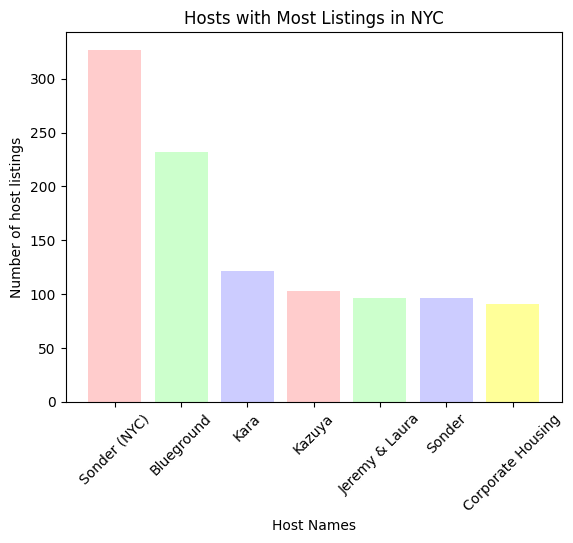

In [13]:
# Visualizing the hosts with most listings.
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFF99', '#FFCCFF']
plt.bar(host_name,host_lisitng,color=colors)
plt.title('Hosts with Most Listings in NYC')
plt.xlabel('Host Names')
plt.ylabel('Number of host listings')
plt.xticks( rotation=45)
plt.show()

**Top Neighbourhood Groups with higher bookings-**

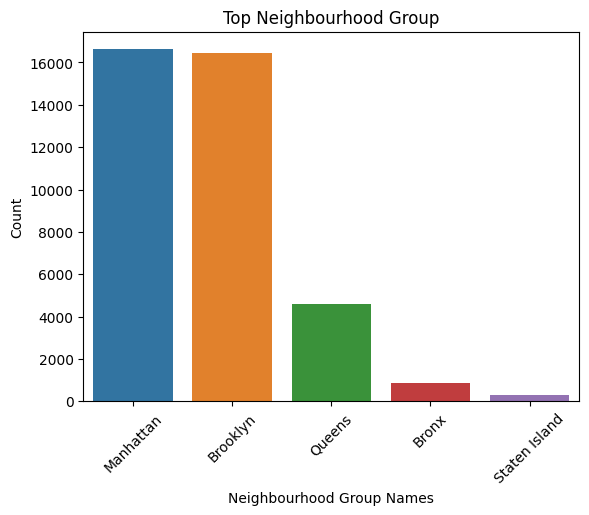

In [14]:
# Number of Airbnb listed in each neighbourhood
neighbourhood_list =  airbnb['neighbourhood_group'].value_counts()
top_neighbourhood=pd.DataFrame(neighbourhood_list)
top_neighbourhood.reset_index(inplace=True)
top_neighbourhood.rename(columns={'index':'neighbourhood group', 'neighbourhood_group':'Neighbourhood Group'}, inplace=True)
#plotting the count of neighbourhood group
viz_1=sns.barplot(x="Neighbourhood Group", y="count", data=top_neighbourhood,
                 )
viz_1.set_title('Top Neighbourhood Group')
viz_1.set_ylabel('Count')
viz_1.set_xlabel('Neighbourhood Group Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)
plt.show()

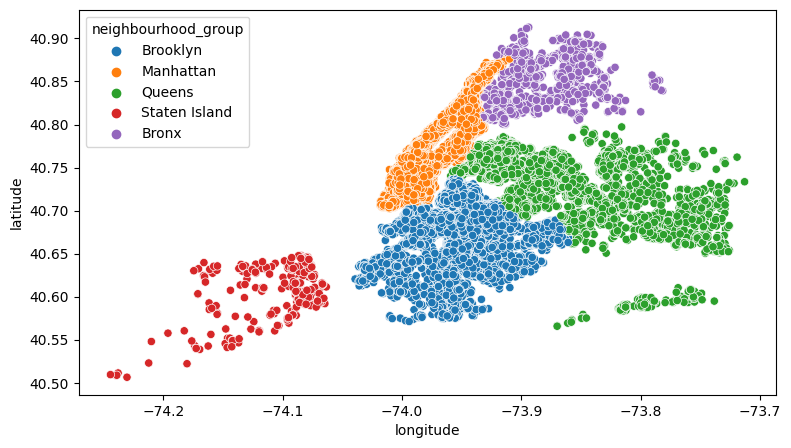

In [15]:
#map of neighbourhood groups
plt.figure(figsize=(9,5))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.ioff()
plt.show()

**Reviews Proportions in Top Neighbourhood Group Areas**-

In [16]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


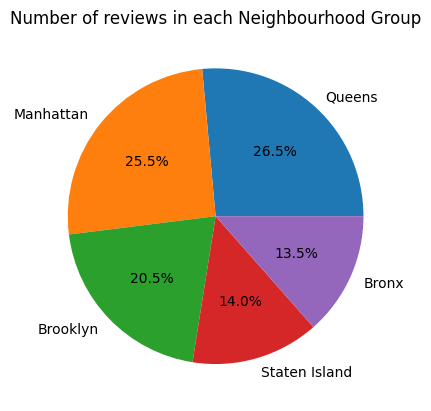

In [17]:
# Visualising the number of reviews in each neighbourhood group through pie chart
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct='%1.1f%%' )
plt.title('Number of reviews in each Neighbourhood Group')
plt.show()

**Distribution & Relationship of Pricing of Listings in Neighbourhood Group Areas-**

In [18]:
# Checking for outliers in price data
airbnb.agg({'price':['mean','median','max','count']})

,price
mean,142.332526
median,101.000000
max,10000.000000
count,38821.000000


The minimum value is set as zero, which does not make any sense since there are no free rooms on Airbnb - and the maximum value is set 10,000 - which just seems too high. Also the mean is considerably higher than the median which means that the data is skewed.

Let's use a boxplot to get a better understanding of price distribution:

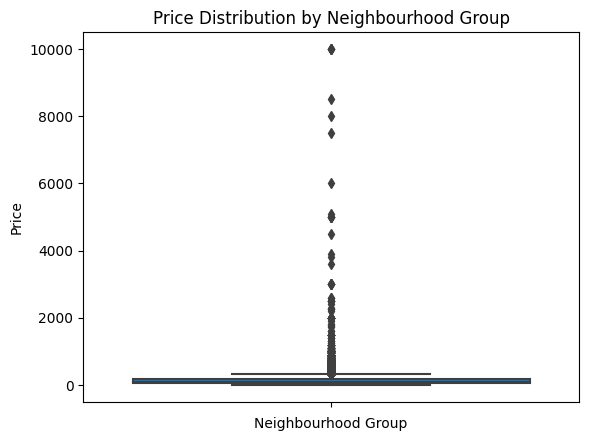

In [19]:
#Plotting the boxplot of the price data.
box_price = sns.boxplot(y='price', data=airbnb).set_title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

So it is clear that there are outliers present in the data. In order to fix this, we will be using the quantile method.First, let's print the 10th and 90th percentile of the price column.

In [20]:
# 10th quantile
q_low = airbnb['price'].quantile(0.10)

#90th quantile
q_high= airbnb['price'].quantile(0.90)
print(q_low,q_high)

49.0 250.0


In [21]:
#removing the values below 10th percentile and above 90th percentile
airbnb_new = airbnb.drop(airbnb[airbnb['price']<q_low].index)
airbnb_new = airbnb.drop(airbnb[airbnb['price']>q_high].index)


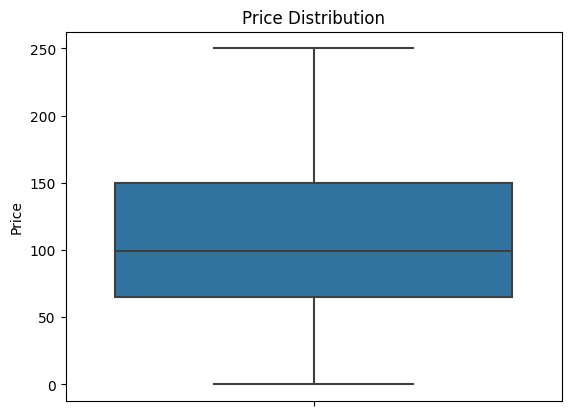

In [22]:
#Lets create a new boxplot and check the result.
box_plot = sns.boxplot(y='price', data=airbnb_new).set_title('Price Distribution')
plt.ylabel('Price')
plt.show()

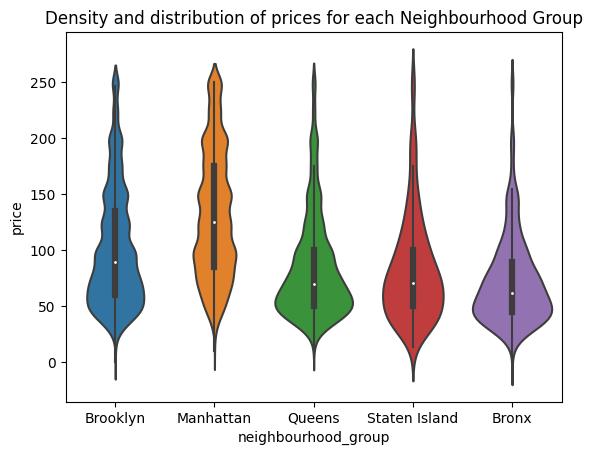

In [23]:
#using violinplot to showcase density and distribtuion of prices according to neighbourhood groups
viz_2=sns.violinplot(data=airbnb_new, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each Neighbourhood Group')
plt.show()

From this violin plot it is clear that Manhattan has the highest range of prices for the listings , followed by Brooklyn. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

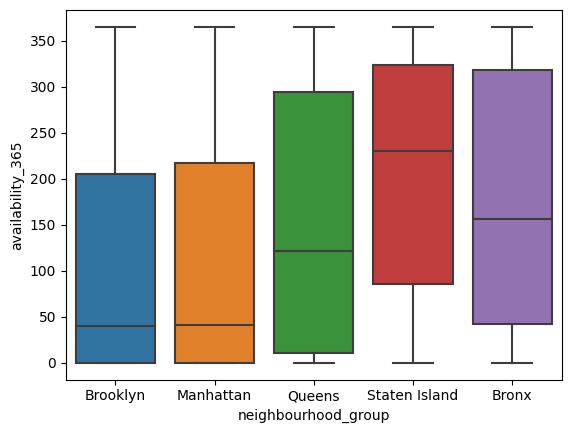

In [24]:
#Relation between neighbourgroup and Availability of Room
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365')
plt.show()

1. Brooklyn, Manhattan are not available for full year.
2. Airbnbs present in Bronx and Staten Island will be most probably available for full year.

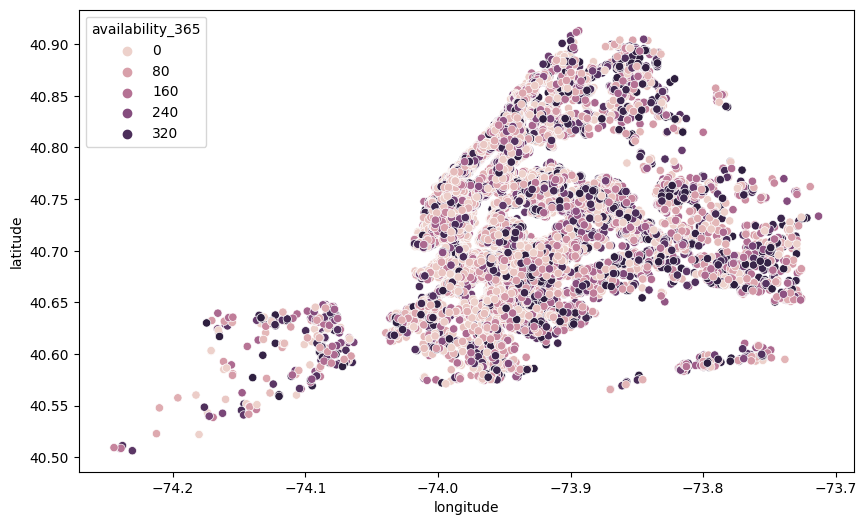

In [25]:
#Visualisation of availability of rooms
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()
plt.show()

**Room Type with Most Bookings-**

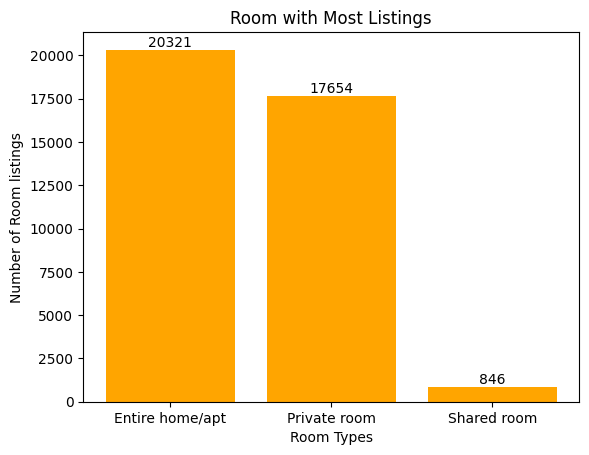

In [26]:
# Grouping data by room type and counting listings
prefered_room = airbnb.groupby(['room_type'])['host_id'].count().reset_index().sort_values(by = 'host_id', ascending = False)
room = prefered_room['room_type']
room_listing = prefered_room['host_id']

# Plotting the bar chart
plt.bar(room, room_listing, color="orange")
plt.title('Room with Most Listings')
plt.xlabel('Room Types')
plt.ylabel('Number of Room listings')

for index, value in enumerate(room_listing):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')
plt.show()


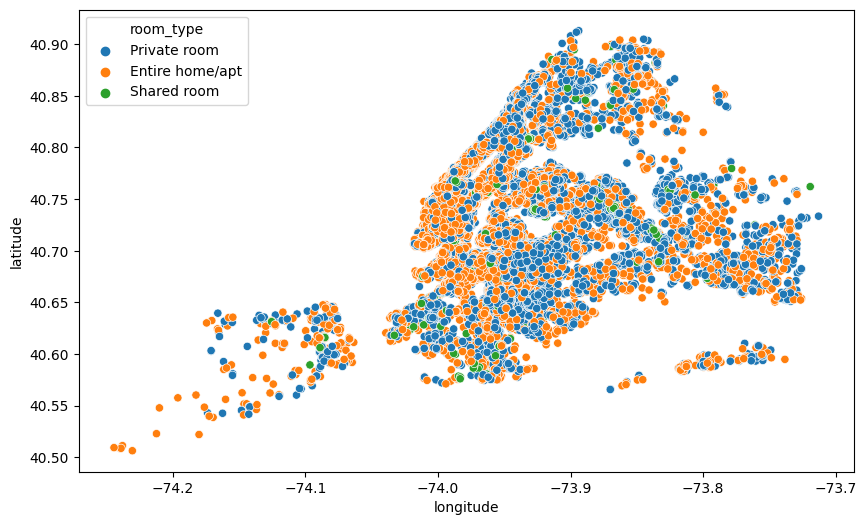

In [27]:
#map of room type 
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.room_type)
plt.ioff()
plt.show()

**Top Neighbourhood Areas with higher bookings-**

In [28]:
# Lets find the top 10 neighbourhoods with most listings
top_neighbourhood = airbnb.groupby(['neighbourhood'])['id'].count().nlargest(10)
top_neighbourhood

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: id, dtype: int64

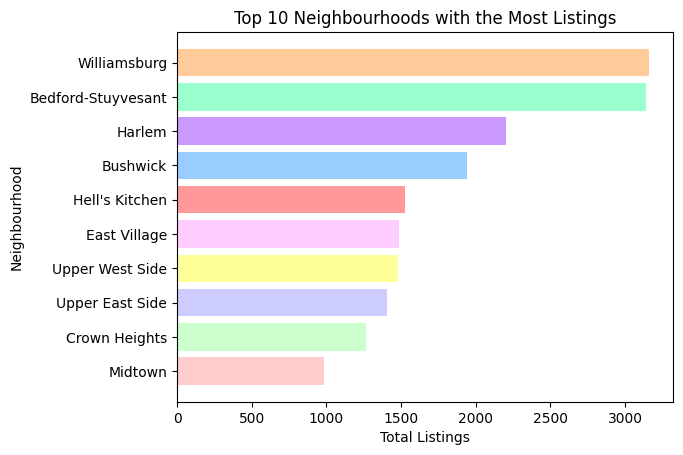

In [29]:
# Visualizing the top 10 neighbourhood listings through bar plot
x = list(top_neighbourhood.index)
y = list(top_neighbourhood.values)
x.reverse()
y.reverse()
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFF99', '#FFCCFF', '#FF9999', '#99CCFF', '#CC99FF', '#99FFCC', '#FFCC99']
plt.barh(x,y,color= colors)
plt.title("Top 10 Neighbourhoods with the Most Listings")
plt.ylabel("Neighbourhood")
plt.xlabel("Total Listings")
plt.show()

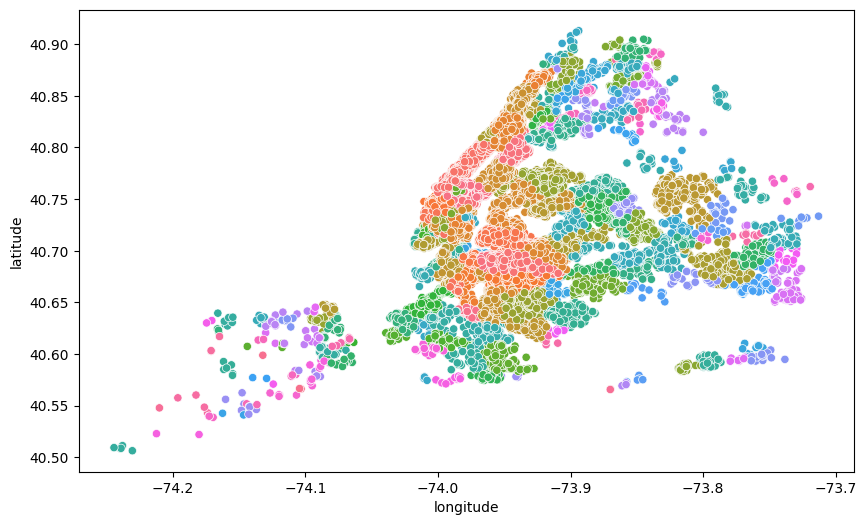

In [30]:
#map of neighbourhood areas-
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood, legend=False)
plt.show()

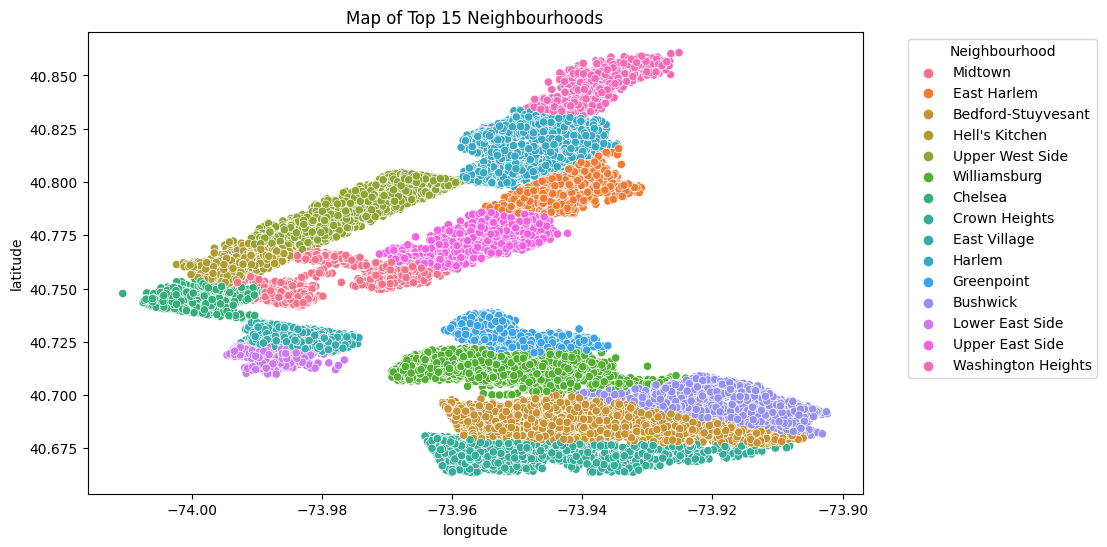

In [31]:
#Visualising Top 15 Neighbourhood on Map

# Step 1: Identify top 15 neighbourhoods
top_neighbourhoods = airbnb['neighbourhood'].value_counts().head(15).index

# Step 2: Filter the data to only include listings from these top 15 neighbourhoods
filtered_airbnb = airbnb[airbnb['neighbourhood'].isin(top_neighbourhoods)]

# Step 3: Plotting the map of neighbourhood areas
plt.figure(figsize=(10,6))
sns.scatterplot(x=filtered_airbnb['longitude'], y=filtered_airbnb['latitude'], hue=filtered_airbnb['neighbourhood'])
plt.title('Map of Top 15 Neighbourhoods')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.ioff()  
plt.show()

In [32]:
#most reviewd room type in neighbourhood belonging to which neighboruhood group
airbnb.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
385,Queens,Jamaica,Private room,629
265,Manhattan,Harlem,Private room,607
357,Queens,East Elmhurst,Private room,543
280,Manhattan,Lower East Side,Private room,540
206,Brooklyn,Park Slope,Entire home/apt,488
138,Brooklyn,Bushwick,Private room,480
367,Queens,Flushing,Private room,474
222,Brooklyn,South Slope,Entire home/apt,467
386,Queens,Jamaica,Shared room,454
251,Manhattan,East Village,Private room,451


The neighborhoods with the most reviews are in Queen and Manhattan given that tourists are more likely to review in those areas.

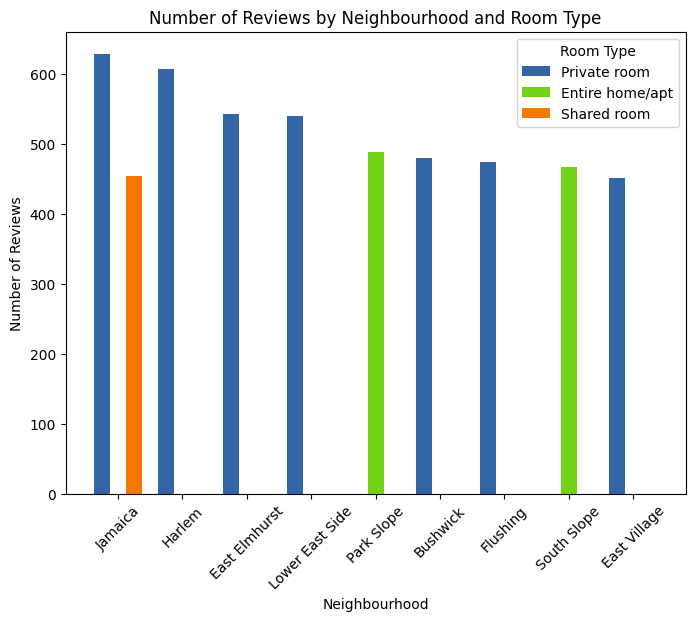

In [33]:
#visualisation of the most reviewd room type in neighbourhood belonging to which neighboruhood group
# Grouping and sorting data
grouped_data = airbnb.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['number_of_reviews'].max().reset_index()
sorted_data = grouped_data.sort_values(by='number_of_reviews', ascending=False).head(10)


fig, ax = plt.subplots(figsize=(8, 6))

# We need to group the bars in the chart, calculate number of unique neighbourhoods and room types
neighbourhoods = sorted_data['neighbourhood'].unique()
room_types = sorted_data['room_type'].unique()


width = 0.25  
n = len(room_types)  # Number of room types
x = np.arange(len(neighbourhoods))  


colors = ['#3465A4','#73D216', '#F57900','#C17D11', '#75507B']

# Creating bars for each room type
for i, room in enumerate(room_types):
    # Filter data for this room type
    filtered_data = sorted_data[sorted_data['room_type'] == room]
    # Order data by neighbourhood for aligned x-axis ticks
    ordered_reviews = [filtered_data[filtered_data['neighbourhood'] == nb]['number_of_reviews'].values[0] if nb in filtered_data['neighbourhood'].values else 0 for nb in neighbourhoods]
    # Plot bars for this room type
    ax.bar(x + i * width, ordered_reviews, width, label=room, color=colors[i % len(colors)])

# Labeling and aesthetics
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews by Neighbourhood and Room Type')
ax.set_xticks(x + width / 2 * (n-1))
plt.xticks( rotation=45)
ax.set_xticklabels(neighbourhoods)
ax.legend(title='Room Type')

# Displaying plot
plt.show()

* In general, the most common Airbnb listing type in New York's neighborhoods is the private room. 
* Specifically, in Jamaica, hosts primarily offer private or shared rooms. 
* Contrastingly, in Park Slope and South Slope, the predominant listings are entire homes or apartments, indicating a trend of residential properties being utilized for Airbnb rentals in these areas.

# **Key Findings-**

**Geographical Focus:** Majority of Airbnb listings are located in Manhattan and Brooklyn, which are also the areas with the most reviews, indicating high guest interest.

**Pricing Insights:** Average listing price is 142.32, with extremes ranging from 0 USD to 10,000 USD. Most common prices fall between 49 USD and 250 USD after outlier adjustment.

**Preference for Room Types:** Entire homes/apartments are the most listed, followed by private rooms, highlighting a preference for privacy among guests. In areas like Jamaica, we do observe availability of shared rooms as Airbnb.

**Host Dominance:** Some hosts, like 'Sonder (NYC)' and 'Blueground', dominate the listings, with the former having up to 327 listings. 

**Availability:** Airbnb listings in New York City are available for an average of 115 days per year, with notable variations by neighborhood. Listings in Brooklyn and Manhattan are rarely available year-round, whereas those in the Bronx and Staten Island are more likely to be available throughout the year, reflecting differing demand and hosting strategies.

**Review Trends:** The highest review counts are predominantly in Queens, suggesting particular listings there are highly favored by guests.



# **Conclusion-**
The analysis of the Airbnb dataset for New York City neighborhoods has revealed key trends, particularly in Manhattan and Brooklyn where there is a strong preference for private accommodations. Although prices vary widely, they are generally moderate once extreme values are removed. A few hosts manage many properties, pointing towards more professionalized Airbnb operations. 
This analysis not only provides valuable insights for new and established hosts aiming to navigate the NYC Airbnb market effectively but it also enhances Python , data analysis , data visualization  and storytelling skills. These skills are crucial for interpreting market trends and making data-driven decisions.